In [54]:
# importing manadatory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# reading the dataset using pandas
df = pd.read_csv('C:\\Users\\swasa\\Desktop\\Dataset2\\train.csv')

In [56]:
# Visulizing the dataset
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [57]:
# shape of the date-set(no.of rows, no.of columns)
df.shape

(18834, 11)

In [58]:
#cheking the data types of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length(m)         18834 non-null float64
height(cm)        18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [59]:
# Checking the null values
df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

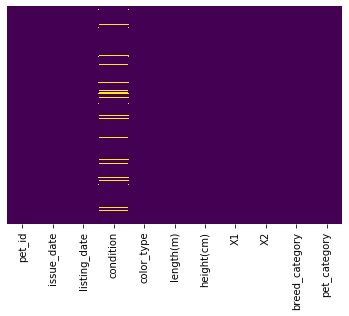

In [60]:
# Visually cheking the null values
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [61]:
# checking the categories in the target variable
df['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

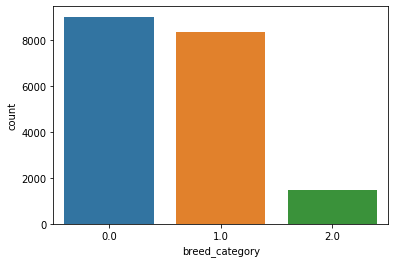

In [62]:
# visully checking the categories in the target variable
sns.countplot(x = 'breed_category', data = df)

In [63]:
# checking the no.of categories in the target variable 2 
df['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

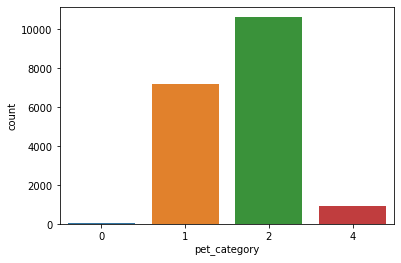

In [64]:
# visually checking the no.of categories in the target variable 2 
sns.countplot(x = 'pet_category', data = df)

(5, 0)

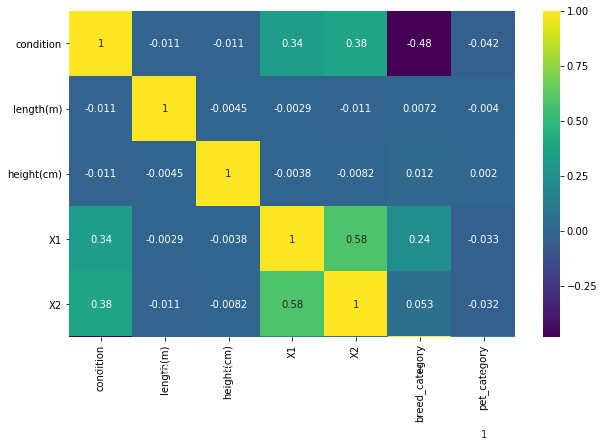

In [65]:
# visullay checking the correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap = 'viridis', annot  = True)
plt.ylim(5,0)

In [66]:
# checking the corelation of 'breed_category' with other features
df.corr()['breed_category'].sort_values().drop('breed_category')

condition      -0.483503
length(m)       0.007229
height(cm)      0.011647
X2              0.052530
pet_category    0.209230
X1              0.240729
Name: breed_category, dtype: float64

In [67]:
# checking the corelation of 'pet_category' with other features
df.corr()['pet_category'].sort_values().drop('pet_category')

condition        -0.041660
X1               -0.032594
X2               -0.032116
length(m)        -0.003999
height(cm)        0.001976
breed_category    0.209230
Name: pet_category, dtype: float64

from the above two outputs, I got to know that --> the two target variables are dependent on each other.

In [68]:
# Cheking no.of categories missing value feature
df['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [69]:
# replacing missing values with mean
df['condition'].fillna(value = df['condition'].mean(), inplace = True)

In [70]:
# rechecking the null_values
df.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

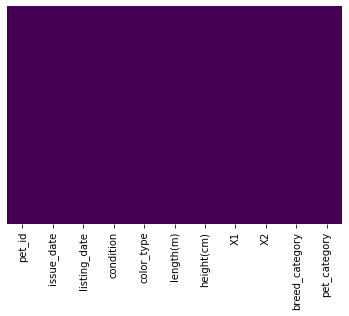

In [71]:
# Visually checking the null values
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [72]:
# viewing only 'object' data-type features
df.select_dtypes(['object']).columns

Index(['pet_id', 'issue_date', 'listing_date', 'color_type'], dtype='object')

### Encoding

In [73]:
# checking the no.of categories in the color_type 
df['color_type'].value_counts().count()

56

In [74]:
from sklearn.preprocessing import LabelEncoder
df['label_encoded_color_type'] = LabelEncoder().fit_transform(df.color_type)

In [75]:
df.drop('color_type', axis = 1, inplace = True)

In [76]:
# taking year from the 'issue_date'
df['issue_date'] = df['issue_date'].apply(lambda date: int(date[:4]))
# taking year from the 'listing_date'
df['listing_date'] = df['listing_date'].apply(lambda date: int(date[:4]))

In [77]:
# I am droping the 'ped_it' feature because there is no use of this feature
df.drop('pet_id', axis = 1, inplace = True)

In [78]:
df.head()

,issue_date,listing_date,condition,length(m),height(cm),X1,X2,breed_category,pet_category,label_encoded_color_type
0,2016,2016,2.00000,0.80,7.78,13,9,0.0,1,18
1,2013,2018,1.00000,0.72,14.19,13,9,0.0,2,53
2,2014,2016,0.88339,0.15,40.90,15,4,2.0,4,15
3,2016,2019,1.00000,0.62,17.82,0,1,0.0,2,53
4,2017,2017,2.00000,0.50,11.06,18,4,0.0,1,2


In [79]:
# selecting dependent and independet features.
X = df.drop(['breed_category','pet_category'], axis = 1)
y = df['breed_category']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from collections import Counter
from imblearn.combine import SMOTETomek
st=SMOTETomek({2.0: 5837})
X_train_st,y_train_st=st.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0.0: 6313, 1.0: 5837, 2.0: 1033})
The number of classes after fit Counter({2.0: 5798, 0.0: 5509, 1.0: 5054})


### model to predict the 'breed_category' only...

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=300)
RFC.fit(X_train_st,y_train_st)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pred = RFC.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.896301539550522
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      2687
         1.0       0.91      0.85      0.88      2520
         2.0       1.00      1.00      1.00       444

    accuracy                           0.90      5651
   macro avg       0.93      0.92      0.92      5651
weighted avg       0.90      0.90      0.90      5651

[[2473  214    0]
 [ 372 2148    0]
 [   0    0  444]]


### model to predict the 'pet_category'

In [84]:
# though the 'breed-category' feature is highly correlated on 'pet_category', I am not considering. 
# beacuse the test.csv doesn't consist of breed-category
# selecting dependent and independet features.
A = df.drop(['breed_category','pet_category'], axis = 1)
b = df['pet_category']

In [85]:
# train, test split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=42)

In [86]:
# Dealing with imbalanced data-set
smt=SMOTETomek({2: 7378, 1: 6090, 4: 6500, 0:6500})
A_train_smt,b_train_smt=smt.fit_sample(A_train,b_train)
print("The number of classes before fit {}".format(Counter(b_train)))
print("The number of classes after fit {}".format(Counter(b_train_smt)))

The number of classes before fit Counter({2: 7378, 1: 5090, 4: 655, 0: 60})
The number of classes after fit Counter({2: 6843, 0: 6488, 4: 6455, 1: 5572})


In [87]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(A_train_smt,b_train_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
predictions = rfc.predict(A_test)
print(accuracy_score(b_test,predictions))
print(classification_report(b_test,predictions))
print(confusion_matrix(b_test,predictions))

0.8446292691559016
              precision    recall  f1-score   support

           0       0.47      0.32      0.38        28
           1       0.83      0.77      0.80      2094
           2       0.86      0.90      0.88      3243
           4       0.84      0.77      0.80       286

    accuracy                           0.84      5651
   macro avg       0.75      0.69      0.72      5651
weighted avg       0.84      0.84      0.84      5651

[[   9    3    6   10]
 [   3 1622  447   22]
 [   3  307 2923   10]
 [   4   26   37  219]]
